<a href="https://colab.research.google.com/github/muhammadsaad021/Forest-Cover-Type-Classification/blob/main/Forest_Cover_type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [5]:
#upload the dataset
from google.colab import files
uploaded=files.upload()

Saving covtype.data to covtype.data


In [6]:
#adding column labels to columns
numerical_cols = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

wilderness_cols = [f'Wilderness_Area_{i}' for i in range(4)]
soil_cols = [f'Soil_Type_{i}' for i in range(40)]

columns = numerical_cols + wilderness_cols + soil_cols + ['Cover_Type']

# Load the .data file
df = pd.read_csv("covtype.data", header=None, names=columns)


In [8]:
#visualizing the data
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

In [11]:
#seperating the features and target value
y=df['Cover_Type']
x=df.drop('Cover_Type',axis=1)


In [12]:
#normalizing the tree types to array indexes
y=y-1
y.unique()

array([4, 1, 0, 6, 2, 5, 3])

In [13]:
#splitting training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#using xgboost
from xgboost import XGBClassifier
XGmodel=XGBClassifier(objective='multi:softmax',     # For classification (discrete class output)
    num_class=7)
XGmodel.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=7, ...)

In [15]:
XGpred=XGmodel.predict(x_test)

In [16]:
#f1 score and other metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, XGpred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



[[35864  6450     1     0    22     3   217]
 [ 5303 50696   195     1   123   159    23]
 [    4   268  6500    29     1   319     0]
 [    0     0    57   452     0    17     0]
 [   29   744    30     0  1184     8     0]
 [    1   213   408    13     1  2853     0]
 [  313    16     0     0     1     0  3685]]


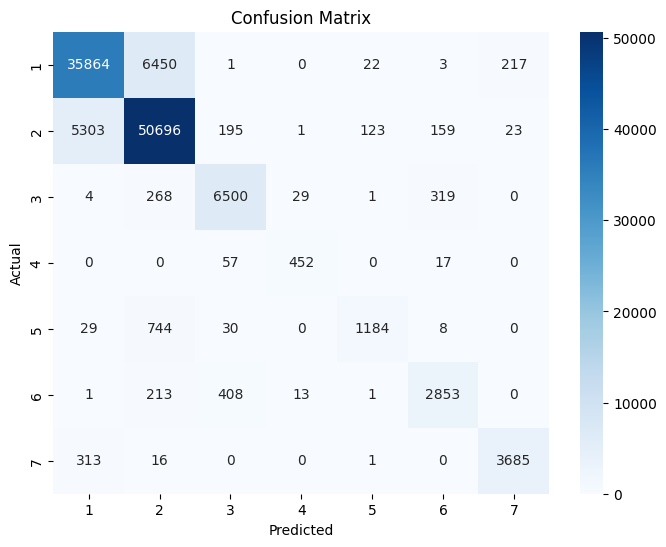

In [17]:
#confusion matrix visualization for XGboost
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, XGpred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
#using Randomforest to compare
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier()
RFmodel.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
RFpred=RFmodel.predict(x_test)


In [20]:
#f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.96      0.95      7121
           3       0.91      0.84      0.87       526
           4       0.94      0.78      0.85      1995
           5       0.93      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.94      0.91      0.92    116203
weighted avg       0.96      0.96      0.95    116203



[[40178  2277     1     0     9     4    88]
 [ 1241 54998    98     1    80    68    14]
 [    2    96  6868    25     5   125     0]
 [    0     0    69   442     0    15     0]
 [   36   382    19     0  1548    10     0]
 [    3   101   229    19     3  3134     0]
 [  175    23     0     0     0     0  3817]]


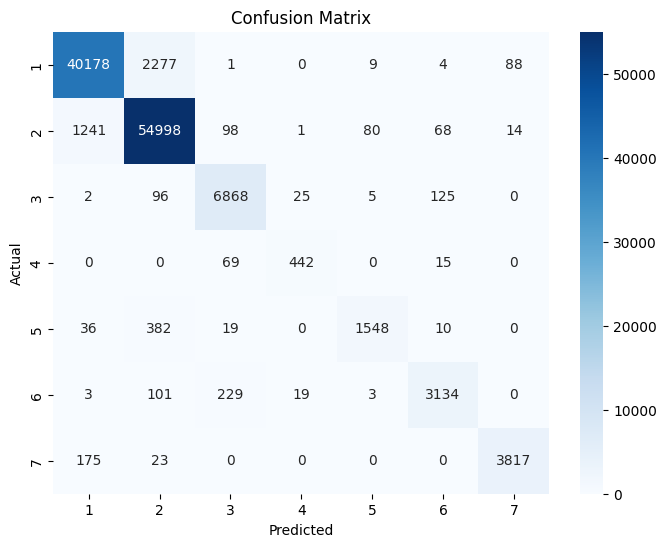

In [21]:
#confusion matrix visualization for Random Forest
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,RFpred)
print(cm2)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7], yticklabels=[1,2,3,4,5,6,7])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#accuracy of both models
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy:", accuracy_score(y_test, RFpred))
print("XGBoost Accuracy:", accuracy_score(y_test, XGpred))

Random Forest Accuracy: 0.9550958236878566
XGBoost Accuracy: 0.8711823274786366
